In [16]:
import numpy as np
import h5py
    
    
def load_dataset():
    train_dataset = h5py.File('Downloads/datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('Downloads/datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [17]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

In [18]:
import os 


In [19]:
os.getcwd()

'C:\\Users\\msi1'

In [20]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes= load_dataset()

y=[1]it is a <built-in method decode of numpy.bytes_ object at 0x0000022D1AD005D0>picture


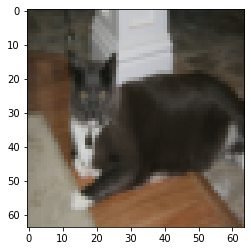

In [22]:
index=47
plt.imshow(train_set_x_orig[index])
print ("y=" + str(train_set_y[:,index]) + "it is a "+ str(classes[train_set_y[0,index]].decode) +"picture")

In [26]:
classes[train_set_y[0,index]]


b'cat'

In [33]:
train_set_y.shape

(1, 209)

In [34]:
train_set_x_orig.shape

(209, 64, 64, 3)

- m_train (number of training examples)
- m_test (number of test examples)
- num_px (= height = width of a training image)

In [32]:
m_train= train_set_x_orig.shape[0] 
m_test= test_set_x_orig.shape[0]
num_px=train_set_x_orig.shape[1]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


### Exercise 2
Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [35]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [36]:
train_set_x_flatten.shape

(12288, 209)

In [37]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

<a name='3'></a>
## 3 - General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**


**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude
    
   ###  propagate
Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$


### Exercise 6 - optimize
Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.


### Exercise 7 - predict
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [111]:
def sigmoid(z):
    s=1/(1+ np.exp(-z))
    return s

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    """
    w=np.zeros([dim,1], dtype=float)
    b=0.0
    return w, b
def propagate(w,b,X,Y):
    """Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
    

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    m=X.shape[1]
    A=sigmoid(np.dot(w.T, X) +b) # will have shape(1,m). All feature mergerd in one element in a column 
    
    
    cost= -(1/m)*(np.sum(Y*np.log(A)- (1-Y)* np.log(1-A))) #dim=(1,m) then to dim(1)
    # backward propagation
    
    dw=(np.dot(X,(A-Y).T))/m # output dim (num_px * num_px * 3, 1)
    db=np.sum((A-Y))/m  # dim=[[1]]
   
    cost = np.squeeze(np.array(cost))
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost



In [112]:
a=np.array([[1,2,3],
   [4,5,6]])
b=np.array([[1,2,3]])


# '*' is used for element wise multiplication 
#np.linalg.inv(matrix) for inverse

In [113]:
print(np.dot(b,a.T))
print(np.dot(a,b.T))

[[14 32]]
[[14]
 [32]]


In [114]:
vector_a = np.array([1,2,3]) # have only one dimension so transpose wont work 
vector_b = np.array([4,5,6])
vector_a.T

array([1, 2, 3])

In [115]:
def optimize(w,b,X,Y, num_iterations=100,learning_rate=0.009, print_cost=False):
    '''w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    '''
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        # (≈ 1 lines of code)
        # Cost and gradient calculation 
        # grads, cost = ...
        # YOUR CODE STARTS HERE
        grads, cost= propagate(w, b, X, Y)
        
        # YOUR CODE ENDS HERE
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        # w = ...
        # b = ...
        # YOUR CODE STARTS HERE
        w=w-learning_rate*dw
        b=b-learning_rate*db
        
        
        # YOUR CODE ENDS HERE
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs
    
# defining predict function when we have to predict passing the value of trained w and b 
# to this function and X test 
def predict(w,b,X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #(≈ 1 line of code)
    # A = ...
    A=sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        Y_prediction[0,i] = 1 if A[0, i] > 0.5 else 0
    return Y_prediction

In [116]:
# merging all 
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
#     X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
#     Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
#     X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
#     Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
#     num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
#     learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
#     print_cost -- Set to True to print the cost every 100 iterations
    
#     Returns:
#     d -- dictionary containing information about the model.
    # initialize parameters with zeros 
    # w, b = ...
    w,b=initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d



In [117]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: -0.215572
Cost after iteration 100: -0.327566
Cost after iteration 200: -0.210874
Cost after iteration 300: -0.070160
Cost after iteration 400: 0.016519
Cost after iteration 500: 0.014625
Cost after iteration 600: 0.012606
Cost after iteration 700: 0.010937
Cost after iteration 800: 0.009531
Cost after iteration 900: 0.008331
Cost after iteration 1000: 0.007297
Cost after iteration 1100: 0.006402
Cost after iteration 1200: 0.005622
Cost after iteration 1300: 0.004942
Cost after iteration 1400: 0.004346
Cost after iteration 1500: 0.003825
Cost after iteration 1600: 0.003368
Cost after iteration 1700: 0.002966
Cost after iteration 1800: 0.002613
Cost after iteration 1900: 0.002303
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %
